In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

# Dallas road network data

- TIGER/Lines data unfortunately doesn't cover the same area as the input data

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.collections
import lzma, collections
import numpy as np
import geopandas as gpd
import open_cp.geometry
open_cp.geometry.configure_gdal()
#import descartes
import tilemapbase
tilemapbase.start_logging()

import opencrimedata.tiger_lines
import opencrimedata.dallas
import opencrimedata.geometry

proj = opencrimedata.dallas.projector()

In [3]:
datadir = os.path.join("..", "..", "..", "..", "Data")
#datadir = os.path.join("/media", "disk", "Data")
tigerdir = os.path.join(datadir, "TIGER Data")
#tigerdir = os.path.join("/media", "disk", "TIGER Data")

## TIGER/Lines data

In [62]:
streets = opencrimedata.tiger_lines.TigerLines(
    os.path.join(tigerdir, "tl_2016_48113_roads__dallas_county"),
    os.path.join(tigerdir, "tl_2016_48113_edges__dallas_county"),
    proj)

In [63]:
tl_graph, _ = streets.make_reduced_graph()

In [6]:
filename = os.path.join(datadir, "Dallas_7_Dec_2017.csv.xz")
with lzma.open(filename, "rt") as file:
    data = [row for row in opencrimedata.dallas.load_full(file)
            if row.lonlat is not None and row.xy is not None]
len(data), data[0]

(120223,
 Row(code='276285-2016', crime_type='BURGLARY', crime_subtype='BURGLARY-RESIDENCE', start_time=datetime.datetime(2016, 11, 16, 11, 0), end_time=datetime.datetime(2016, 11, 18, 11, 0), call_time=datetime.datetime(2016, 11, 18, 11, 42, 26), address='5850 BELT LINE RD', city='DALLAS 75254', lonlat=(-96.807131, 32.953948), xy=(758206.7262484236, 2144003.9338816064)))

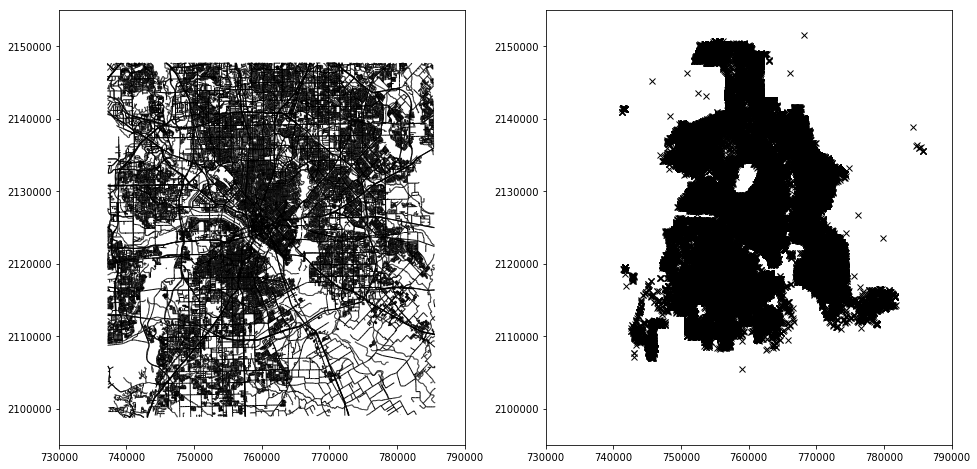

In [64]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

ax = axes[0]
li = matplotlib.collections.LineCollection(tl_graph.as_lines(), color="black", linewidth=1)
ax.add_collection(li)

pts = np.asarray([proj(*row.lonlat) for row in data])
ax = axes[1]
ax.scatter(*pts.T, color="black", marker="x", linewidth=1)

x, y = 760000, 2125000
d = 30*1000
for ax in axes:
    ax.set(xlim=[x-d, x+d], ylim=[y-d,y+d])

## Streets shapefile

Available from: https://www.dallasopendata.com/Geography-Boundaries/Streets-Shapefile-Polyline/cvgm-fp24

Can download as "original" or as "shapefile".  These seem to contain the same data, in an annoyingly slightly different format.  I'll use the "shapefile" format.

In [8]:
frame = gpd.read_file(os.path.join(datadir, "DALLAS STREETS_1_"))
frame.head()

,ALT_NAME,ALT_PREFIX,ALT_SUFFIX,ALT_TYPE,CITY_L,CITY_R,CLASS,COUNTY00_L,COUNTY00_R,FCC,...,SEGMENT_ID,SHAPE_len,SHIELD,SPEED,SUFFIX,TF_COST,TF_DIR,TYPE,T_ZLEV,geometry
0,None,None,None,None,DALLAS,DALLAS,PRIVATE,085,085,A70,...,2784,469.200923,None,5,None,0.213273,None,None,0,LINESTRING (2498122.509064242 7046926.72033780...
1,OSAGE PLAZA,None,None,PKWY,DALLAS,DALLAS,MINOR ARTERIAL,085,085,A45,...,2251,366.871091,None,30,None,0.166760,N,PKWY,0,LINESTRING (2498123.783176243 7049520.19797222...
2,RONNIE,None,None,DR,DALLAS,DALLAS,MINOR ARTERIAL,085,085,A40,...,2780,363.605869,None,25,None,0.165275,None,DR,0,LINESTRING (2496873.364743069 7047324.59553818...
3,RIDGECREST,None,None,DR,DALLAS,DALLAS,MINOR ARTERIAL,113,113,A40,...,220,90.078585,None,25,None,0.040945,None,DR,0,LINESTRING (2555826.044221982 6927306.16035440...
4,ROCKY TOP,None,None,CIR,DALLAS,DALLAS,MINOR ARTERIAL,085,085,A40,...,2785,78.824942,None,25,None,0.035830,None,CIR,0,LINESTRING (2495314.382341623 7046978.98120185...


In [9]:
frame = gpd.read_file(os.path.join(datadir, "Dallas Streets Shapefile - Polyline"))
frame.head()

,alt_name,alt_prefix,alt_suffix,alt_type,city_l,city_r,class,county_00_,f_zlev,fcc,...,schl_zone,segment_id,shape_len,shield,speed,suffix,t_zlev,tf_cost,tf_dir,type
0,None,None,None,None,DALLAS,DALLAS,PRIVATE,085,0.0,A70,...,None,2784.0,469.200923,None,5.0,None,0.0,0.213273,None,None
1,OSAGE PLAZA,None,None,PKWY,DALLAS,DALLAS,MINOR ARTERIAL,085,0.0,A45,...,Y,2251.0,366.871091,None,30.0,None,0.0,0.166760,N,PKWY
2,RONNIE,None,None,DR,DALLAS,DALLAS,MINOR ARTERIAL,085,0.0,A40,...,None,2780.0,363.605869,None,25.0,None,0.0,0.165275,None,DR
3,RIDGECREST,None,None,DR,DALLAS,DALLAS,MINOR ARTERIAL,113,0.0,A40,...,None,220.0,90.078585,None,25.0,None,0.0,0.040945,None,DR
4,ROCKY TOP,None,None,CIR,DALLAS,DALLAS,MINOR ARTERIAL,085,0.0,A40,...,None,2785.0,78.824942,None,25.0,None,0.0,0.035830,None,CIR


In [10]:
frame.iloc[0]

alt_name                                                   None
alt_prefix                                                 None
alt_suffix                                                 None
alt_type                                                   None
city_l                                                   DALLAS
city_r                                                   DALLAS
class                                                   PRIVATE
county_00_                                                  085
f_zlev                                                        0
fcc                                                         A70
ft_cost                                                0.213273
ft_dir                                                     None
fullstreet                                                 None
geometry      LINESTRING (-96.77254620230994 32.988523779823...
hwy_num                                                    None
l_f_add                                 

## The rows

- `alt_name`
- `alt_prefix`
- `alt_suffix`
- `alt_type` : These 4 seem to describe the name of the street, but see "fullstreet" below
- `city_l`
- `city_r` : The city the left/right side of the road is in?
- `class` : The type of road ("PRIVATE", "SECONDARY", "WALK", "PAPER" etc.)
- `county_00_` :  County code?
- `f_zlev` : ??? One of a small number of integers
- `fcc` : ??? One of a small number of codes
- `ft_cost` : ??? The "cost" of traversing this way from/to
- `ft_dir` : Mostly `None`, or one of "E", "S", "W", "N"
- `fullstreet` : All caps name of the street
- `hwy_num` : The (state?) highway number, if applicable
- `l_f_add` and `l_t_add` Address range for left, from/to
- `l_row` : The city, oddly
- `name` : Street name, without "drive" etc.
- `one_way` : Mostly "B", sometimes "FT" or "TF" (from/to or to/from ??)
- `place_00_l`
- `place_00_r` : ???
- `postal_l`
- `postal_r` : Zip codes
- `prefix` : Name prefix???
- `r_f_add` and `r_t_add` : Addresses for right, from/to
- `r_row`: The city
- `schl_zone` : ??? School zone
- `segment_id` : Internal graph structure code?
- `shape_len` : Length of the line
- `shield` : One of a small number of codes
- `speed` : Speed limit?
- `suffix` : Part of the name?
- `t_zlev` : ??? One of a small number of integers
- `tf_cost` : ??? The "cost" of traversing this way to/from
- `tf_dir` : Mostly `None`, or one of "E", "S", "W", "N"
- `type` : "PKWY", "LN" etc.

In [11]:
frame["city_r"].unique()

array(['DALLAS', 'UNIVERSITY PARK', 'MESQUITE', 'GARLAND', 'HIGHLAND PARK',
       'BALCH SPRINGS', 'RICHARDSON', 'SEAGOVILLE', 'LANCASTER',
       'CARROLLTON', 'ADDISON', 'HUTCHINS', 'COCKRELL HILL',
       'GRAND PRAIRIE', 'DUNCANVILLE', 'CEDAR HILL', 'UNINCORPORATED',
       'IRVING', 'COPPELL', 'SUNNYVALE', 'FARMERS BRANCH', 'DESOTO',
       'ROWLETT'], dtype=object)

In [12]:
frame["class"].unique()

array(['PRIVATE', 'MINOR ARTERIAL', 'HIGHWAY', 'RAMP', 'MAJOR ARTERIAL',
       'SECONDARY', 'WALKWAY', 'PAPER', 'TRAIL', 'PRIMARY HIGHWAY',
       'CAD ONLY', 'DALLAS AREA HIGHWAY'], dtype=object)

In [13]:
frame["county_00_"].unique()

array(['085', '113', '397', '121', '257', '439'], dtype=object)

In [14]:
frame["f_zlev"].unique()

array([ 0.,  1.,  2., -1.,  4.,  3.])

In [15]:
frame["fcc"].unique()

array(['A70', 'A45', 'A40', 'A15', 'A63', 'A35', 'A60', 'A64', 'A30',
       'A25', 'A61', 'A20', 'A10', 'A71', 'A38', 'A00', 'A50', 'A62',
       'A28', 'A31', 'A65', 'A51', 'A36'], dtype=object)

In [16]:
collections.Counter(frame["ft_dir"])

Counter({None: 80775, 'E': 5506, 'N': 6272, 'S': 3264, 'W': 2115})

In [17]:
frame["l_row"].unique()

array(['DALLAS', 'RICHARDSON', 'GARLAND', 'MESQUITE', 'UNIVERSITY PARK',
       'HIGHLAND PARK', 'BALCH SPRINGS', 'SEAGOVILLE', 'UNINCORPORATED',
       'LANCASTER', 'CARROLLTON', 'FARMERS BRANCH', 'HUTCHINS',
       'GRAND PRAIRIE', 'COCKRELL HILL', 'DUNCANVILLE', 'CEDAR HILL',
       'DESOTO', 'ROWLETT', 'COPPELL', 'IRVING', 'SUNNYVALE', 'ADDISON',
       'WYLIE', 'EULESS', None], dtype=object)

In [18]:
frame["r_row"].unique()

array(['DALLAS', 'RICHARDSON', 'GARLAND', 'MESQUITE', 'HIGHLAND PARK',
       'BALCH SPRINGS', 'SEAGOVILLE', 'LANCASTER', 'UNIVERSITY PARK',
       'CARROLLTON', 'FARMERS BRANCH', 'UNINCORPORATED', 'HUTCHINS',
       'GRAND PRAIRIE', 'COCKRELL HILL', 'DUNCANVILLE', 'CEDAR HILL',
       'DESOTO', 'COPPELL', 'IRVING', 'SUNNYVALE', 'ADDISON', 'ROWLETT',
       'WYLIE', 'EULESS', None], dtype=object)

In [19]:
collections.Counter(frame["one_way"])

Counter({'B': 63585, 'FT': 17322, 'TF': 17025})

In [20]:
frame["place_00_r"].unique()

array(['19000', '61796', '29000', '74492', '47892', '33824', '05372',
       '66428', '41212', '13024', '01240', '25452', '35612', '15796',
       '30464', '21628', '13492', '20092', None, '37000', '16612', '71156',
       '63572', '80356', '58016', '24768'], dtype=object)

In [21]:
collections.Counter(frame["shield"])

Counter({None: 90911, 'T': 898, 'I': 1942, 'S': 3321, 'U': 860})

In [22]:
frame["t_zlev"].unique()

array([ 0.,  1.,  2.,  3.,  4., -1.])

In [23]:
collections.Counter(frame["ft_dir"]), collections.Counter(frame["tf_dir"])

(Counter({None: 80775, 'E': 5506, 'N': 6272, 'S': 3264, 'W': 2115}),
 Counter({None: 81067, 'N': 3214, 'W': 5234, 'S': 6350, 'E': 2067}))

In [24]:
frame["type"].unique()

array([None, 'PKWY', 'DR', 'CIR', 'LN', 'TPKE', 'ACRD', 'WAY', 'RD', 'AVE',
       'CT', 'ST', 'TRL', 'BLVD', 'PL', 'SERV', 'WALK', 'RAMP', 'HWY',
       'CONN', 'CV', 'SQ', 'CTR', 'FWY', 'EXPY', 'TER', 'PLZ', 'PARK',
       'ROW', 'XING', 'ALY', 'PASS', 'MALL', 'MEWS', 'RDG', 'HOV', 'EXT',
       'PATH', 'LOOP', 'VLG', 'BND', 'PT', 'BRG', 'VW'], dtype=object)

## Names

A lot of noise.

In [25]:
problems = [[], [], []]
for idx, row in frame.iterrows():
    datum = row["prefix"], row["name"], row["type"], row["suffix"], row["fullstreet"]
    parts = [x for x in datum[:-1] if x is not None]
    if len(parts) == 0:
        if not row["fullstreet"] is None:
            problems[0].append(datum)
        continue
    expect = " ".join(parts)
    got = row["fullstreet"]
    if got is None:
        problems[1].append(datum)
        continue
    if row["suffix"] is not None:
        expect = " ".join(parts[:-1])
        got = " ".join(got.split(" ")[:-1])
    if got.endswith("B") and got[-2] in {"S", "N", "W", "E"}:
        got = got[:-3]
    if not expect == got:
        problems[2].append(datum)

In [26]:
tuple(len(x) for x in problems)

(140, 109, 770)

# Lengths

In [27]:
framep = frame.to_crs({"init":"EPSG:2845"})

In [28]:
lengths = []
for idx, row in framep.iterrows():
    l = row["geometry"].length
    ll = row["shape_len"] * opencrimedata.dallas._FT_TO_METERS
    lengths.append((l, ll))
lengths = np.asarray(lengths)

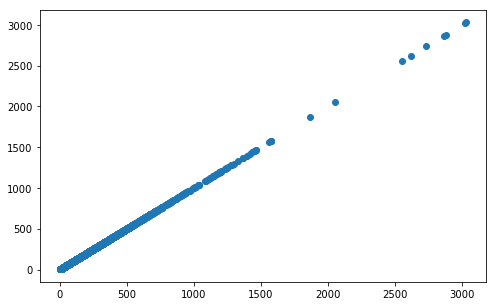

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(*lengths.T)

# `class`

From browing around QGIS, we want to avoid:

- "CAD ONLY" which are very small fake segments
- "TRAIL" which are indeed hiking trails

Want to include:
- "WALKWAY" not many, but I think we want these (to model actors moving on foot...)

Tricky:
- "PAPER" is hard.  It seems to correspond often to new, or planned, roads.  If we leave them out, we miss some genuine roads; but probably not many buildings.  The streets are often disconnected from others.  I think we leaver them out.

In [30]:
f = frame[["fullstreet", "class"]]
f = gpd.GeoDataFrame(f)
f.geometry = frame.geometry
f.crs = {"init":"EPSG:4326"}
#f.to_file("dallas_temp")

In [31]:
c = collections.Counter(f["class"])
for key in c.keys():
    ff = f[f["class"] == key]
    #ff.to_file("dallas_"+key)

In [32]:
c

Counter({'CAD ONLY': 75,
         'DALLAS AREA HIGHWAY': 23,
         'HIGHWAY': 4502,
         'MAJOR ARTERIAL': 21847,
         'MINOR ARTERIAL': 58488,
         'PAPER': 420,
         'PRIMARY HIGHWAY': 1,
         'PRIVATE': 6303,
         'RAMP': 5536,
         'SECONDARY': 67,
         'TRAIL': 534,
         'WALKWAY': 136})

## Costs

Look at `ft_cost`, `ft_dir` and their `tf` variants.
- A "normal" street seems to have the "dir"s as `None` and equal "cost"s
- Remaining seem to be multi-lane highways, where the two lanes are separated out, and genuinely one-way streets.
- If `ft_dir` is not None, then the edge is oriented in the "natural" way; if `tf_dir` is not None, then oriented in the opposite direction.  And a tiny number of exceptions.
- Finding a good pattern linking the "cost"s and "dir"s seems hard-- too many exceptions
- One pattern is that either the costs are equal, or one is "-1" (one exception to this!)

In [33]:
f = frame[["ft_dir", "ft_cost", "tf_dir", "tf_cost", "fullstreet", "class"]]
m = (f["ft_cost"] != f["tf_cost"]) | f["ft_dir"].map(lambda x : x is not None) | f["tf_dir"].map(lambda x : x is not None)
f = gpd.GeoDataFrame(f)
f.geometry = frame.geometry
f = f[m]
f.crs = {"init":"EPSG:4326"}
#f.to_file("dallas_temp")

In [34]:
m1 = f["ft_dir"].map(lambda x : x is None)
m2 = f["ft_cost"] < 0
f[m1 != m2].head()

,ft_dir,ft_cost,tf_dir,tf_cost,fullstreet,class,geometry
841,None,0.072670,S,0.072670,MAHAM RD,MINOR ARTERIAL,LINESTRING (-96.7612447474488 32.9281266447751...
1021,None,0.126978,None,-1.000000,MEADOWKNOLL DR,MINOR ARTERIAL,LINESTRING (-96.73734716465019 32.906827571263...
2290,None,0.156515,N,-1.000000,SKILLMAN ACRD N,RAMP,LINESTRING (-96.7515482496719 32.8579176679222...
2597,None,0.015330,None,-1.000000,E NORTHWEST HWY,MAJOR ARTERIAL,LINESTRING (-96.74975566252522 32.856800764925...
3212,None,0.042608,S,0.042608,ALCOTT ST,MINOR ARTERIAL,LINESTRING (-96.78656702900622 32.815133727172...


In [35]:
m1 = f["ft_dir"].map(lambda x : x is None)
m2 = f["tf_dir"].map(lambda x : x is None)
ff = f[(~m1 & ~m2)]
#ff.to_file("dallas_temp_1")

In [36]:
ff

,ft_dir,ft_cost,tf_dir,tf_cost,fullstreet,class,geometry
75577,E,0.0,W,-1.0,SPRING VALLEY RD,MAJOR ARTERIAL,LINESTRING (-96.75070292527275 32.939994515517...
89236,S,0.0,N,0.0,1ST AVE,PRIVATE,LINESTRING (-96.76019802382616 32.776346082304...
89237,S,0.0,N,0.0,1ST AVE,PRIVATE,LINESTRING (-96.76007457654764 32.776244276240...
89238,S,0.0,N,0.0,1ST AVE,PRIVATE,LINESTRING (-96.75973397380514 32.775970721762...
96746,N,0.0,S,0.0,None,RAMP,LINESTRING (-96.68460256922098 32.778031369215...
97685,S,0.0,N,0.0,None,DALLAS AREA HIGHWAY,LINESTRING (-96.80883986065145 32.769959462462...
97690,S,0.0,N,0.0,None,DALLAS AREA HIGHWAY,LINESTRING (-96.80789392392221 32.769428447854...
97863,N,0.0,S,0.0,WORCOLA ST,MINOR ARTERIAL,LINESTRING (-96.7717110132008 32.8394045702236...


In [37]:
f[(f["ft_cost"] != f["tf_cost"]) & (f["ft_cost"] != -1) & (f["tf_cost"] != -1)]

,ft_dir,ft_cost,tf_dir,tf_cost,fullstreet,class,geometry
25911,None,0.016,N,0.016393,W ALTOONA DR,MAJOR ARTERIAL,LINESTRING (-96.88741695597039 32.691281243550...


## Segment id

In [38]:
frame["segment_id"].unique().shape, len(frame)

((97932,), 97932)

# Load with the library

In [41]:
streets = list(opencrimedata.dallas.load_street_lines(os.path.join(datadir, "Dallas Streets Shapefile - Polyline")))

In [49]:
def street_proj(row):
    l = np.asarray(row.line)
    return np.asarray(proj(*l.T)).T

graph, edge_lookup = opencrimedata.geometry.graph_from_streets(streets, street_proj)

In [50]:
street_proj(streets[0])

array([[  761429.26362131,  2147907.56017404],
       [  761572.27126869,  2147908.76556535]])

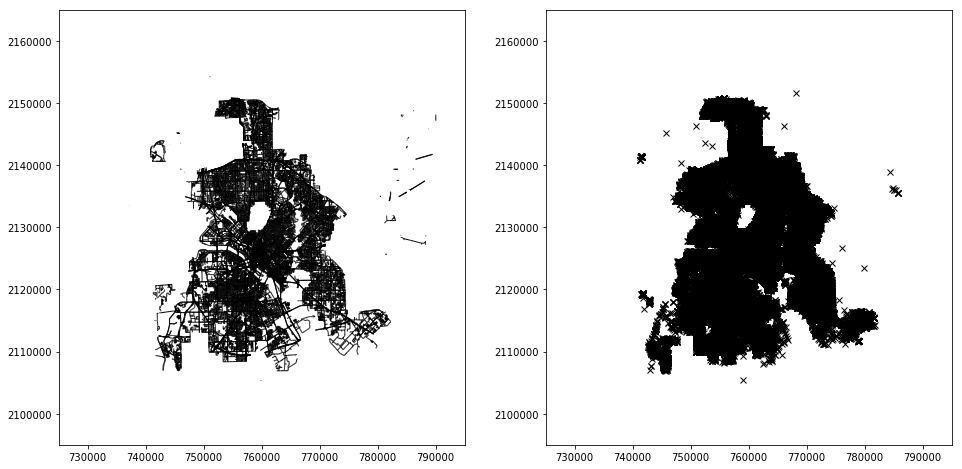

In [52]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

ax = axes[0]
li = matplotlib.collections.LineCollection(graph.as_lines(), color="black", linewidth=1)
ax.add_collection(li)

pts = np.asarray([proj(*row.lonlat) for row in data])
ax = axes[1]
ax.scatter(*pts.T, color="black", marker="x", linewidth=1)

x, y = 760000, 2130000
d = 35*1000
for ax in axes:
    ax.set(xlim=[x-d, x+d], ylim=[y-d,y+d])

In [58]:
wm_graph = graph.project(lambda x, y : tilemapbase.project(*proj(x, y, inverse=True)))

In [65]:
wm_tl_graph = tl_graph.project(lambda x, y : tilemapbase.project(*proj(x, y, inverse=True)))

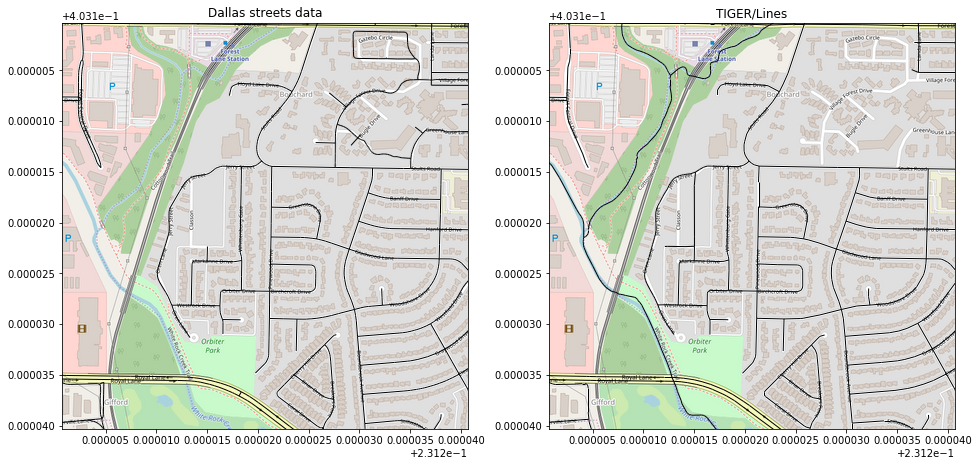

In [69]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

ex = tilemapbase.Extent.from_centre_lonlat(-96.760550, 32.903141, xsize=0.00004)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=600)
for ax in axes:
    plotter.plot(ax)

ax = axes[0]
li = matplotlib.collections.LineCollection(wm_graph.as_lines(), color="black", linewidth=1)
ax.add_collection(li)

ax = axes[1]
li = matplotlib.collections.LineCollection(wm_tl_graph.as_lines(), color="black", linewidth=1)
ax.add_collection(li)

axes[0].set_title("Dallas streets data")
axes[1].set_title("TIGER/Lines")
None

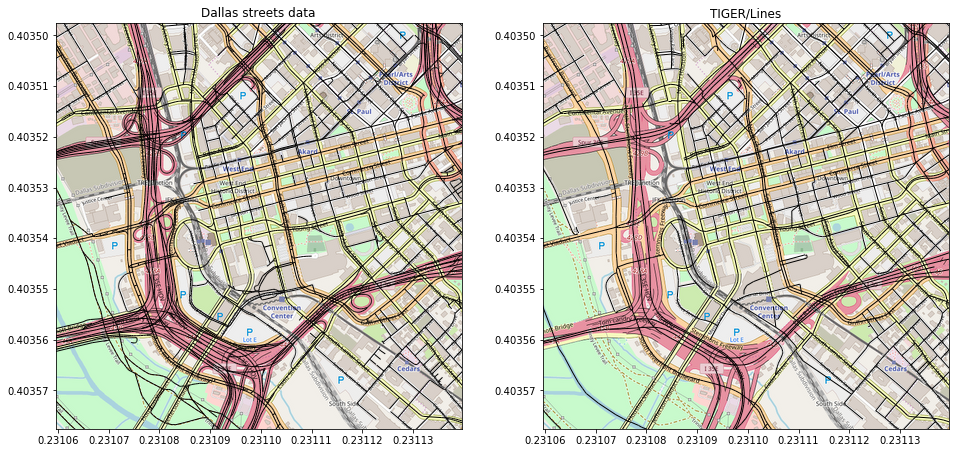

In [70]:
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

ex = tilemapbase.Extent.from_centre_lonlat(-96.804158, 32.776941, xsize=0.00008)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=600)
for ax in axes:
    plotter.plot(ax)

ax = axes[0]
li = matplotlib.collections.LineCollection(wm_graph.as_lines(), color="black", linewidth=1)
ax.add_collection(li)

ax = axes[1]
li = matplotlib.collections.LineCollection(wm_tl_graph.as_lines(), color="black", linewidth=1)
ax.add_collection(li)

axes[0].set_title("Dallas streets data")
axes[1].set_title("TIGER/Lines")
None